In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
colmun_names = ['user_id', 'item_id', 'rating', 'timestamp']
dfDadosUser = pd.read_csv('E:\\GIT\\MachineLearning\\kaggle - bases de dados\\u.data.csv', sep='\t', names = colmun_names)

dfDadosUser.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
dfDadosUser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
movieTitles = pd.read_csv('E:\GIT\MachineLearning\kaggle - bases de dados\Movie_Id_Titles.csv')
movieTitles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
dfMoviesUser = pd.merge(dfDadosUser, movieTitles, on = 'item_id')


In [6]:
dfMoviesUser.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [7]:
dfMoviesUser[dfMoviesUser['item_id'] == 1]

,user_id,item_id,rating,timestamp,title
3397,308,1,4,887736532,Toy Story (1995)
3398,287,1,5,875334088,Toy Story (1995)
3399,148,1,4,877019411,Toy Story (1995)
3400,280,1,4,891700426,Toy Story (1995)
3401,66,1,3,883601324,Toy Story (1995)
...,...,...,...,...,...
3844,895,1,4,879437950,Toy Story (1995)
3845,747,1,5,888639138,Toy Story (1995)
3846,786,1,4,882841828,Toy Story (1995)
3847,800,1,4,887646283,Toy Story (1995)


In [8]:
#Groupby por titulos e media do rating

dfMoviesUser.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [9]:
#Filmes por ordem asceente (maior para o menor)

dfMoviesUser.groupby('title')['rating'].mean().sort_values(ascending = False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [10]:
#Filmes mais vistos 

dfMoviesUser.groupby('title')['rating'].count().sort_values(ascending = False).head(20)

title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: rating, dtype: int64

In [11]:
#filmes menos vistos

dfMoviesUser.groupby('title')['rating'].count().sort_values().head(20)

title
Á köldum klaka (Cold Fever) (1994)             1
Mille bolle blu (1993)                         1
Mat' i syn (1997)                              1
Marlene Dietrich: Shadow and Light (1996)      1
Man from Down Under, The (1943)                1
Mamma Roma (1962)                              1
Mad Dog Time (1996)                            1
Big Bang Theory, The (1994)                    1
MURDER and murder (1996)                       1
Coldblooded (1995)                             1
Low Life, The (1994)                           1
Love Is All There Is (1996)                    1
Lotto Land (1995)                              1
Bird of Prey (1996)                            1
Liebelei (1933)                                1
Leopard Son, The (1996)                        1
Lashou shentan (1992)                          1
Land and Freedom (Tierra y libertad) (1995)    1
Lady of Burlesque (1943)                       1
Big One, The (1997)                            1
Name: rating, 

In [12]:
#Estabelecendo um relação entre rating (media) e os filmes mais vistos


mediaRating = pd.DataFrame(dfMoviesUser.groupby('title')['rating'].mean())
mediaRating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
mediaRating['Views'] = pd.DataFrame(dfMoviesUser.groupby('title')['rating'].count())
mediaRating.head()

,rating,Views
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [15]:
#Filmes com media 5 e pouco vistos/avaliados
#podem ser desconsiderdos

mediaRating[(mediaRating['rating'] == 5) & (mediaRating['Views'] <= 5)].sort_values('Views')

,rating,Views
title,,
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
"Great Day in Harlem, A (1994)",5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
Someone Else's America (1995),5.0,1
They Made Me a Criminal (1939),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


In [16]:
#134 filmes vistos apenas uma vez
#podem ser desconsiderdos

mediaRating[(mediaRating['Views'] == 1)].sort_values('Views')

,rating,Views
title,,
Aiqing wansui (1994),5.0,1
Shopping (1994),2.0,1
Shadows (Cienie) (1988),1.0,1
Shadow of Angels (Schatten der Engel) (1976),1.0,1
Scream of Stone (Schrei aus Stein) (1991),3.0,1
...,...,...
Girl in the Cadillac (1995),1.0,1
Getting Away With Murder (1996),1.0,1
"Gate of Heavenly Peace, The (1995)",4.0,1


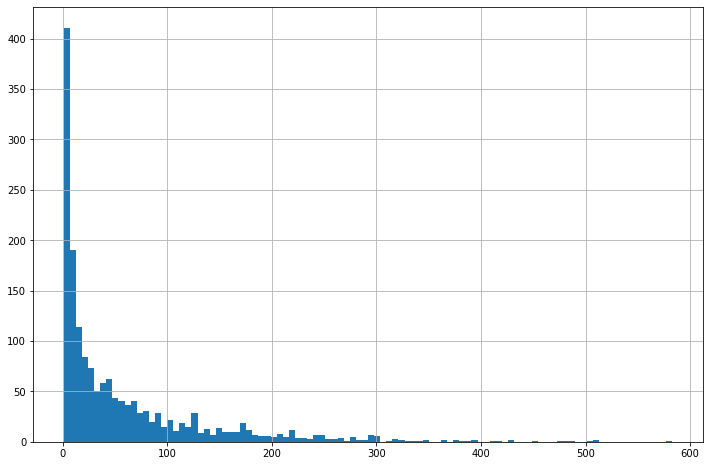

In [17]:
#Grafico

#predominancia de filmes que foram vistos por poucos usuarios
plt.figure(figsize =(12,8))
mediaRating['Views'].hist(bins = 100)

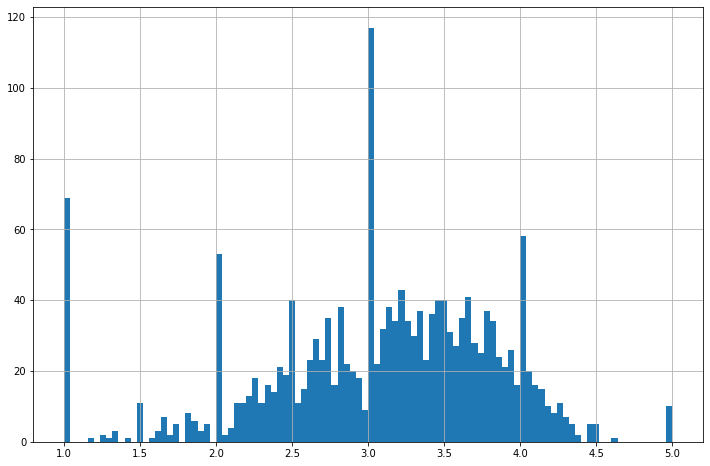

In [18]:
#Grafico

#grafico com base na avaliação dos filmes
plt.figure(figsize =(12,8))
mediaRating['rating'].hist(bins = 100)

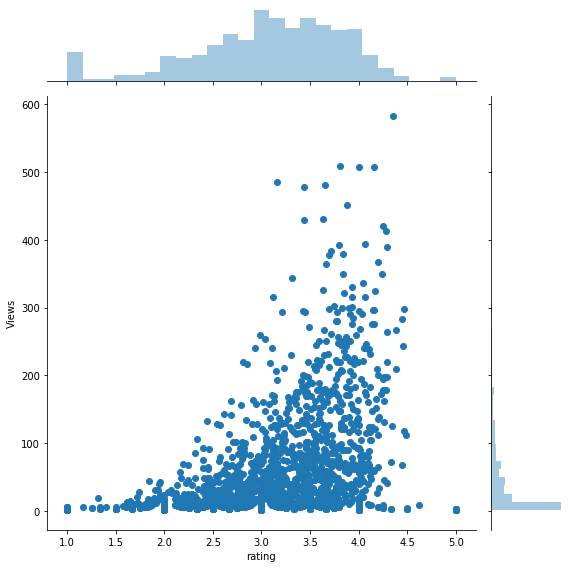

In [19]:
#grafico em realção a rating X Views

sns.jointplot(data=mediaRating, x='rating', y='Views', height=8)

In [29]:
#Construindo sistema de recomendação 

reshapeMovies = dfMoviesUser.pivot_table(index='user_id', columns='title', values='rating')
reshapeMovies.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [31]:
#irei recomendar os filmes Star Wars e Liar Liar

mediaRating.sort_values('Views', ascending = False).head()

,rating,Views
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [33]:
#criando cenario de recomendação baseado no filme Star Wars

#dataframe star wars
starWarsRatings = reshapeMovies['Star Wars (1977)']
starWarsRatings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [37]:
#criando cenario de recomendação baseado no filmes Liar Liar

#dataframe liar liar
liarRatings = reshapeMovies['Liar Liar (1997)']
liarRatings.head()

user_id
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
Name: Liar Liar (1997), dtype: float64

In [41]:
#estabelecendo similaridades entre os titulos

similarAStarWars = reshapeMovies.corrwith(starWarsRatings)
similarAStarWars.head(10)

title
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
dtype: float64

In [42]:
#estabelecendo similaridades entre os titulos

similarALiar = reshapeMovies.corrwith(liarRatings)
similarALiar.head(10)

title
'Til There Was You (1997)                      0.118913
1-900 (1994)                                        NaN
101 Dalmatians (1996)                          0.469765
12 Angry Men (1957)                            0.066272
187 (1997)                                     0.175145
2 Days in the Valley (1996)                    0.040739
20,000 Leagues Under the Sea (1954)           -0.027932
2001: A Space Odyssey (1968)                  -0.057864
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.400918
dtype: float64

In [49]:
#Criando dataframe de correlação/similaridades do Filme StarWars e apagando valores nulos

correlacaoStarWars = pd.DataFrame(similarAStarWars, columns=['Correlacao'])
correlacaoStarWars.dropna(inplace=True)
correlacaoStarWars.sort_values('Correlacao', ascending = False).head(10)

,Correlacao
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [52]:
#Problematica, pouco vistos dentem a ser outliars (nota muito baixa ou muito alta), podemos retirar os menos vistos/avaliados

#vamos fazer um join entre a correlação e mediaRating para saber o numero de visualização dos filmes

correlacaoStarWars = correlacaoStarWars.join(mediaRating['Views'])
#so executa uma vez, na segunda vai apresentar um erro pois o join ja foi feito

ValueError: columns overlap but no suffix specified: Index(['Views'], dtype='object')

In [53]:
correlacaoStarWars.head()

,Correlacao,Views
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [56]:
#Problematica, pouco vistos dentem a ser outliars (nota muito baixa ou muito alta), podemos retirar os menos vistos/avaliados

#fazer um filtro para correlação, apenas para filmes que foram vistos por mais de 100 usuarios

correlacaoStarWars[correlacaoStarWars['Views'] > 100].sort_values('Correlacao', ascending = False).head(10)


,Correlacao,Views
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [57]:
#Criando dataframe de correlação/similaridades do Filme Liar Liar e apagando valores nulos

correlacaoLiar = pd.DataFrame(similarALiar, columns=['Correlacao'])
correlacaoLiar.dropna(inplace=True)
correlacaoLiar.sort_values('Correlacao', ascending = False).head(10)

,Correlacao
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [58]:
#Problematica, pouco vistos dentem a ser outliars (nota muito baixa ou muito alta), podemos retirar os menos vistos/avaliados

#vamos fazer um join entre a correlação e mediaRating para saber o numero de visualização dos filmes

correlacaoLiar = correlacaoLiar.join(mediaRating['Views'])
#so executa uma vez, na segunda vai apresentar um erro pois o join ja foi feito

In [60]:
correlacaoLiar[correlacaoLiar['Views'] > 100].sort_values('Correlacao', ascending = False).head(10)

,Correlacao,Views
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
